Visualizing data...


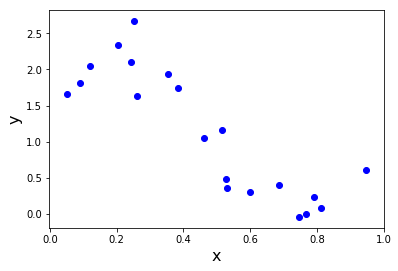

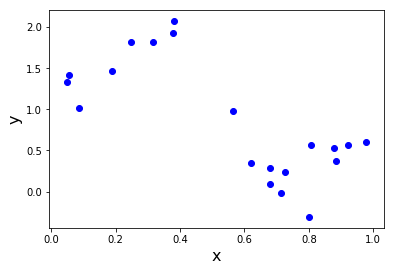


Investigating linear regression...
d) : 40.233847409671

Investigating gradient descent...
step size:  0.0001
number of iterations: 10000
time taken:  0.17133593559265137
model cost:  4.0863970368
coefficient vector: [ 2.27044798 -2.46064834]
step size:  0.001
number of iterations: 7021
time taken:  0.1423628330230713
model cost:  3.91257640579
coefficient vector: [ 2.4464068 -2.816353 ]
step size:  0.01
number of iterations: 765
time taken:  0.02100205421447754
model cost:  3.91257640579
coefficient vector: [ 2.44640703 -2.81635347]
step size:  0.0407
number of iterations: 10000
time taken:  0.27721214294433594
model cost:  2.71091652001e+39
coefficient vector: [ -9.40470931e+18  -4.65229095e+18]

Investigating closed form...
time taken:  0.00045013427734375
model cost:  3.91257640579
coefficient vector: [ 2.44640709 -2.81635359]

Invesigating learning rate part f...
number of iterations: 2094
time taken:  0.04934501647949219
model cost:  3.91257640579
coefficient vector: [ 2.4464075

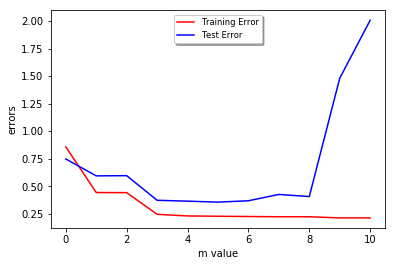

Investigating regularized regression...
Done!


In [39]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).

# python libraries
import os

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

#time library
import time
######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # determine filename
        dir = os.path.abspath('')
        f = os.path.join(dir, '..', 'data', filename)
        
        # load data
        with open(f, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)


class PolynomialRegression() :
    
    def __init__(self, m=1, reg_param=0) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
            lambda_ -- float
                       regularization parameter
        """
        self.coef_ = None
        self.m_ = m
        self.lambda_ = reg_param
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        #print(X)
        #X0 = np.ones((n,1))
        #print(X0)
        #X = np.hstack((X0,X))
        #print(X)
        # part g: modify to create matrix for polynomial model
        #Phi = X
        m = self.m_
        Phi = np.zeros((n, m+1))
        for i in range(0,n):
            val=[1]
            index=[(m+1)*i]
            for j in range(0,m):
                val.append(val[j]*X.flat[i])
                index.append(index[j]+1)
            np.put(Phi, index, val)

        
        ### ========== TODO : END ========== ###
        
        return Phi
    
    
    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        if self.lambda_ != 0 :
            raise Exception("GD with regularization not implemented")
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        
        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1/float(1+t) # change this line
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###
                
            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(X, self.coef_) # change this line ????????
            #y_pred = np.zeros(n)
            #for i in range(0,n):
                #np.put(y_pred, i, np.dot(X[i], self.coef_))
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)    
            self.coef_ -= 2*eta*np.dot((y_pred-y), X) #sum and xn,j?????
            ### ========== TODO : END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        
        print('number of iterations: %d' % (t+1))
        
        return self
    
    
    def fit(self, X, y, l2regularize = None ) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            l2regularize    -- set to None for no regularization. set to positive double for L2 regularization
                
        Returns
        --------------------        
            self    -- an instance of self
        """
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        
        XtX = np.dot(X.transpose(), X)
        Xinv = np.linalg.pinv(XtX)
        XtY = np.dot(X.transpose(), y)
        self.coef_ = np.dot(Xinv, XtY)
       
        ### ========== TODO : END ========== ###
    
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part c: predict y
        y = None
        y = np.dot(X, self.coef_)#theta t dot x
        ### ========== TODO : END ========== ###
        
        return y
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        if self.coef_ is None: 
            raise Exception("Model not initialized. Perform a fit first.")
        X = self.generate_polynomial_features(X)
        cost = ((np.dot(X, self.coef_) - y)**2).sum()
        ### ========== TODO : END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        n,d = X.shape
        import math
        error = math.sqrt(self.cost(X,y)/n)
        
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


######################################################################
# main
######################################################################

def main() :
    # load data
    train_data = load_data('regression_train.csv')
    test_data = load_data('regression_test.csv')
    
    
    
    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')
    train_data.plot()
    test_data.plot()
    print()
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')
    model = PolynomialRegression()
    model.coef_ = np.zeros(2)
    cost = model.cost(train_data.X, train_data.y)
    print ("d) : {}".format(cost))
    print()
    
    print('Investigating gradient descent...')
    for eta in [0.0001, 0.001, 0.01, 0.0407]:
        print('step size: ', eta)
        time1 = time.time()
        model.fit_GD(train_data.X, train_data.y, eta=eta, verbose=False)
        print('time taken: ', time.time()-time1)
        print('model cost: ', model.cost(train_data.X, train_data.y))
        print('coefficient vector:', model.coef_)
        
    print()
    print('Investigating closed form...')
    model = PolynomialRegression()
    time1 = time.time()
    model.fit(train_data.X, train_data.y)
    print('time taken: ', time.time()-time1)
    print('model cost: ', model.cost(train_data.X, train_data.y))
    print('coefficient vector:', model.coef_)
    
    print()
    print('Invesigating learning rate part f...')
    model = PolynomialRegression()
    time1 = time.time()
    model.fit_GD(train_data.X, train_data.y)
    print('time taken: ', time.time()-time1)
    print('model cost: ', model.cost(train_data.X, train_data.y))
    print('coefficient vector:', model.coef_)
    
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('Investigating polynomial regression...')
    training_errors = []
    test_errors = []
    mValues = [0,1,2,3,4,5,6,7,8,9,10]
    for m in mValues:
        model=PolynomialRegression(m=m)
        model.fit(train_data.X, train_data.y)
        trainingErr = model.rms_error(train_data.X, train_data.y)
        print(m)
        testingErr = model.rms_error(test_data.X, test_data.y)
        print(testingErr)
        print()
        training_errors.append(trainingErr)
        test_errors.append(testingErr)
        
    plt.plot(mValues, training_errors, 'r', label="Training Error")
    plt.plot(mValues, test_errors, 'b', label="Test Error")
    plt.xlabel("m value")
    plt.ylabel("errors")
    legend = plt.legend(loc='upper center', shadow=True, fontsize='small')
    plt.show()
        

    
        
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts j-k (extra credit): main code for regularized regression
    print('Investigating regularized regression...')
        
    ### ========== TODO : END ========== ###
    
    
    
    print("Done!")

if __name__ == "__main__" :
    main()


In [23]:
X=np.array([[0,5],[1,2]])
print(X.transpose())
print(X.transpose().transpose())

[[0 1]
 [5 2]]
[[0 5]
 [1 2]]
